In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


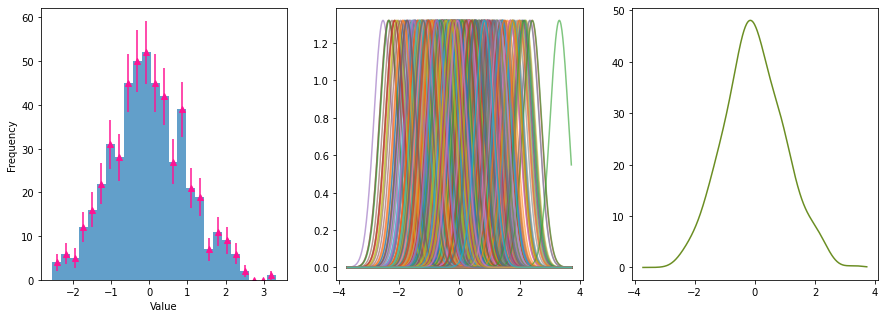

In [4]:
from scipy.stats import norm
from scipy.integrate import trapz

x=np.random.randn(500)
counts, bis = np.histogram(x, bins=25)
step=bis[1]-bis[0]
as_x = .5*(bis[1:]+bis[:-1])
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
yerror=np.sqrt(counts)
ax1.hist(x, bins=25, alpha=0.7)
ax1.errorbar(as_x, counts, yerr=yerror, errorevery=1, fmt='^', color='deeppink')


rang = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 500)
std = 1.06*x.std()*len(x)**(-1/5)
for i in range(len(x)):
    [ax2.plot(rang,norm.pdf(rang,x[i],scale=std), alpha=0.6)]

y=np.sum([norm.pdf(rang,x[i],scale=std) for i in range(len(x))],axis=0)
ax3.plot(rang,(y)*step*500/np.trapz(y,rang), color='olivedrab')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

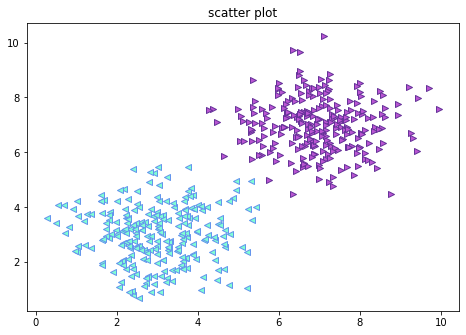

In [6]:
import numpy.random as npr

def twoD_dataset(m1,m2,std1,std2):
    g1=tuple(npr.normal(m1,std1,500))
    g2=tuple(npr.normal(m2,std2,500))
    array=np.array(g1+g2)
    df=pd.DataFrame(array.reshape(250,4,order='F'),columns=['A','B','C','D'])
    return df
r=twoD_dataset(3,7,1,1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(r['A'], r['B'], marker='<', color='aquamarine',edgecolor='cornflowerblue')
ax.scatter(r['C'],r['D'], marker='>', color='mediumorchid',edgecolor='rebeccapurple')
ax.set_title('scatter plot')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

<ErrorbarContainer object of 3 artists>

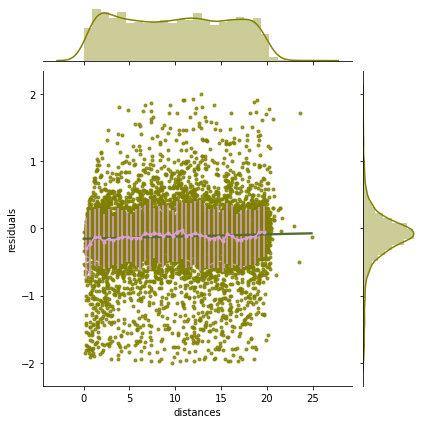

In [8]:
data=np.load('residuals_261.npy',allow_pickle=True) 
dt= pd.DataFrame(data.item())
dt = dt[np.abs(dt['residuals'])<2]

from scipy.stats import linregress

t=dt['residuals']
f=dt['distances']
#slope, intercept, r_value, p_value, std_err=linregress(f, t)
#plt.plot(f, t, '.', label='data', alpha=0.5, color='olive')
#plt.plot(f, intercept + slope*f, 'darkolivegreen', label='fitted line')

import seaborn as sns
j=sns.jointplot(x=f, y=t, kind="reg", marker='.', color='olive', data=dt)
regline = j.ax_joint.get_lines()[0]
regline.set_color('darkolivegreen')

dt = dt[dt['distances']<20]
x=np.arange(0,20.5,0.5)
dt['grouped']=np.digitize(dt['distances'], x)
dataMean=dt.groupby(['grouped']).mean()
dataStd=dt.groupby(['grouped']).std()
x=dataMean['distances']
y=dataMean['residuals']
erry=dataStd['residuals']
plt.errorbar(x,y,  yerr=erry, color='plum',marker='.')